In [1]:
import pandas as pd
df=pd.read_excel('Topic_Modeling\Data\전처리_10182.xlsx',sheet_name='Sheet2')
df.head()

,filelist,cleanedsdgs
0,1.samsung_electronic2021.txt,health use concern environment health safety m...
1,2.sk_hynix2021.txt,investment cooperation increase partner wedote...
2,3.NAVER_2020.txt,number youth employment decent entrepreneurshi...
3,4.Samsung_Biologics_2021.txt,goal quality education learning goal gender eq...
4,6.KAKAO_2020.txt,number youth employment decent entrepreneurshi...


In [2]:
import nltk
#Data Preprocessing Package
import re
import numpy as np
import pandas as pd
import os
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
import re
import nltk
#from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import WordPunctTokenizer 
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
import re

from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from nltk.tag import pos_tag

In [15]:
#수정버전!!!

stop_words=nltk.corpus.stopwords.words('english')
stop_words=list(set(stop_words).union(set(sklearn_stop_words)))
tokenizer=WordPunctTokenizer()
lemma = WordNetLemmatizer()
remove_bracket=['step','report','reporting','management','goal','sdgs','business','group','company']
stop_words.extend(remove_bracket)#
len(stop_words)
def prepro(text):

    a=text.lower()
    a=re.sub('\n',' ',a)
    a=re.sub('x0002','',a)
    b = re.sub('[^a-zA-Z ]','',a).strip()

    tagged_list = pos_tag(tokenizer.tokenize(b))
    ad_and_nouns = [t[0] for t in tagged_list if (t[1] == "NN")or(t[1]=="NNP")]
    e_list= [lemma.lemmatize(i) for i in ad_and_nouns]
    result=[w for w in e_list if (w not in stop_words) and  (len(w) > 2)]
    # remove single character

    return result

In [16]:
raw = list(df['cleanedsdgs'])

In [17]:
clean_list=[' '. join(prepro(i)) for i in raw]

In [18]:
df['after_clean']=clean_list
df

,filelist,cleanedsdgs,after_clean
0,1.samsung_electronic2021.txt,health use concern environment health safety m...,health use concern environment health safety m...
1,2.sk_hynix2021.txt,investment cooperation increase partner wedote...,investment cooperation increase partner center...
2,3.NAVER_2020.txt,number youth employment decent entrepreneurshi...,number employment entrepreneurship literacy so...
3,4.Samsung_Biologics_2021.txt,goal quality education learning goal gender eq...,quality education gender equality availability...
4,6.KAKAO_2020.txt,number youth employment decent entrepreneurshi...,number employment entrepreneurship day educati...
5,7.Samsung_SDI2020.txt,operate learning training acquisition support ...,operate acquisition support job expertise oper...
6,11.kia_2021.txt,governance economy environment governance foun...,governance economy environment governance foun...
7,13.posco_2020.txt,respond change environment promote water manag...,respond change environment promote water enfor...
8,14.HDMobis_2021.txt,contribution development growth development ex...,contribution development growth development ex...
9,15.SAMSUNG_C_T_2021.txt,net zero roadmap contribution realization econ...,net roadmap contribution realization economy c...


In [19]:
len(df)

19

In [20]:
temp=[i.split() for i in df.after_clean.to_list()]
temp[:2]

[['health',
  'use',
  'concern',
  'environment',
  'health',
  'safety',
  'manufacturing',
  'disclosure',
  'substance',
  'process',
  'inhouse',
  'therapy',
  'treatment',
  'center',
  'health',
  'center',
  'education',
  'development',
  'variety',
  'support',
  'ict',
  'knowledge',
  'expertise',
  'education',
  'curriculum',
  'support',
  'innovation',
  'campus',
  'samsung',
  'solve',
  'tomorrow',
  'growth',
  'stability',
  'change',
  'globe',
  'youth',
  'leadership',
  'training',
  'work',
  'support',
  'childbirth',
  'childcare',
  'ministry',
  'gender',
  'equality',
  'family',
  'use',
  'water',
  'reuse',
  'recycle',
  'campaign',
  'wastewater',
  'country',
  'impact',
  'water',
  'world',
  'water',
  'day',
  'event',
  'water',
  'energy',
  'use',
  'climate',
  'change',
  'use',
  'energy',
  'installation',
  'power',
  'energy',
  'innovation',
  'growth',
  'share',
  'technology',
  'society',
  'culture',
  'productivity',
  'growth',

In [21]:
def flatten(l):
    flatlist=[]
    for elem in l:
        if type(elem) ==list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

word_list=flatten(temp)

word_list=pd.Series([x for x in word_list if len(x)>2]) #한글자는  제외


In [30]:
word_list.value_counts().head(70)

energy         73
support        47
development    47
growth         42
quality        39
               ..
disaster        9
plant           9
action          9
school          9
practice        8
Length: 70, dtype: int64

In [31]:
fre = pd.DataFrame(word_list.value_counts().head(80))
fre

,0
energy,73
support,47
development,47
growth,42
quality,39
...,...
justice,8
partner,8
center,8
security,8


In [32]:
fre.columns=['frequency']

In [33]:
from wordcloud import WordCloud # Joohye, you need to install wordcloud
from collections import Counter # in conda CLI by doing "conda install -c conda-forge wordcloud"

font_path="./install/NanumGothic.ttf" #pre-downloaded in the folder
wordcloud=WordCloud(font_path, width=800, height=800, background_color="white")

# font_path

count = Counter(word_list)
wordcloud=wordcloud.generate_from_frequencies(count)

array=wordcloud.to_array()

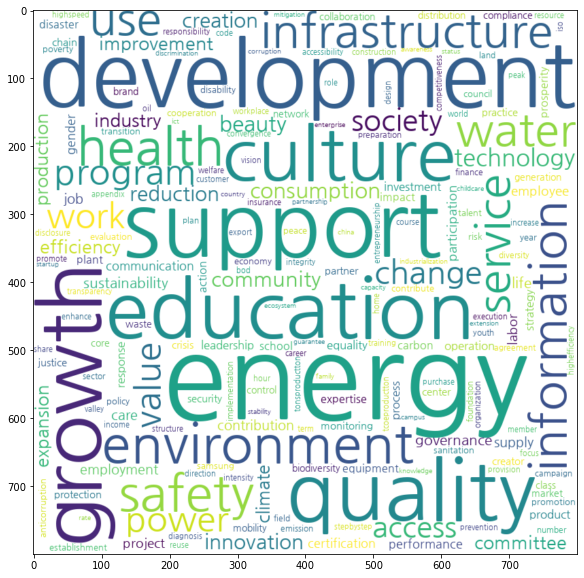

<Figure size 432x288 with 0 Axes>

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
plt.imshow(array, interpolation='bilinear')
plt.show()
plt.savefig('word_1.png')

In [35]:
fre.to_excel('sdgs빈도분석.xlsx')